In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Ridge_Regression_with_5datasets/Boston/HousingData (1).csv')

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
data.shape

(506, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
data['CHAS'].value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

In [11]:
for i in data.columns:
  data[i] = data[i].fillna(data[i].mode()[0])

In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
data['AGE'] = data['AGE'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    int64  
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

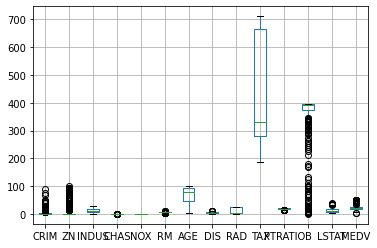

In [16]:
data.boxplot()
plt.show()

In [17]:
def iqr_capping(data,col):
  for i in col:

    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3-q1

    upper_whisker = q3 + (1.5*iqr)
    lower_whisker = q1 - (1.5*iqr)

    data[i] = np.where(data[i] > upper_whisker,upper_whisker,np.where(data[i] < lower_whisker,lower_whisker,data[i]))

In [18]:
iqr_capping(data,data.columns)

<Axes: >

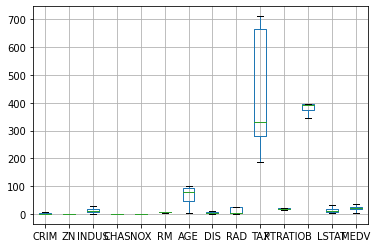

In [19]:
data.boxplot()

In [20]:
from scipy.stats import skew
for i in data:
  print(i)
  print(skew(data[i]))


CRIM
1.1987267211332127
ZN
nan
INDUS
0.21154748727786796
CHAS
nan
NOX
0.7271441597740319
RM
0.29575980420727294
AGE
-0.6244710261203543
DIS
0.9057712057246071
RAD
1.0018334924536951
TAX
0.6679682687237768
PTRATIO
-0.7602329696386183
B
-1.160753513452725
LSTAT
0.8518525253464677
MEDV
0.35256457780103845


In [21]:
data['CRIM'] = np.sqrt(data['CRIM'])
data['NOX'] = np.sqrt(data['NOX'])
data['AGE'] = np.log(data['AGE'])
data['DIS'] = np.sqrt(data['DIS'])
data['RAD'] = np.sqrt(data['RAD'])
data['TAX'] = np.log(data['TAX'])
data['PTRATIO'] = np.log(data['PTRATIO'])
data['B'] = np.log(data['B'])
data['LSTAT'] = np.log(data['LSTAT'])

In [22]:
for i in data:
  print(i)
  print(skew(data[i]))

CRIM
0.9114574948077262
ZN
nan
INDUS
0.21154748727786796
CHAS
nan
NOX
0.5351964490014817
RM
0.29575980420727294
AGE
-1.7849370137320277
DIS
0.5159376744955726
RAD
0.8213996403008884
TAX
0.3295759344940256
PTRATIO
-0.9517075133745347
B
-1.1921319130550754
LSTAT
-0.27158874093140506
MEDV
0.35256457780103845


In [23]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
data = standardizer.fit(data).transform(data)

In [24]:
from sklearn.model_selection import train_test_split
X = data[:,:-1]
y = data[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)



(404, 13)
(102, 13)


In [25]:
import time
start_time = time.time()

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r1 = Ridge(alpha=1)
r1.fit(X_train,y_train)
pred_train_r1 = r1.predict(X_train)

print('train R^2:',r2_score(y_train,pred_train_r1))
print('train mean square error:',(mean_squared_error(y_train,pred_train_r1)))
print('train root mean square error:',np.sqrt(mean_squared_error(y_train,pred_train_r1)))
print('train mean absolute error',mean_absolute_error(y_train,pred_train_r1))
print('-----------------------------------------')

pred_test_r1 = r1.predict(X_test)

print('test R^2:',r2_score(y_test,pred_test_r1))
print('test mean square error:',(mean_squared_error(y_test,pred_test_r1)))
print('test root mean square error:',np.sqrt(mean_squared_error(y_test,pred_test_r1)))
print('test mean absolute error',mean_absolute_error(y_test,pred_test_r1))
print('-----------------------------------------')

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train R^2: 0.7859394679632575
train mean square error: 0.21621975406795368
train root mean square error: 0.46499435917863957
train mean absolute error 0.346508974469861
-----------------------------------------
test R^2: 0.8261856894717312
test mean square error: 0.16638086832479992
test root mean square error: 0.4078981102246
test mean absolute error 0.3271221371547061
-----------------------------------------
Time taken : 0.053986310958862305


In [26]:
r1.coef_

array([-0.17056747,  0.        , -0.05145645,  0.        , -0.17008495,
        0.17210261,  0.00542387, -0.25455377,  0.24872067, -0.21106144,
       -0.21559406,  0.01147868, -0.53696725])

In [27]:
start_time = time.time()

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.00001,0.001,0.01,0.1,1,10,100]}
tuning = GridSearchCV(r1, param_grid,cv=10)
tuning.fit(X_train,y_train)
print(tuning.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

{'alpha': 10}
Time taken : 0.19562745094299316


In [28]:
r1 = Ridge(alpha=tuning.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=10)

In [29]:
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
r1 = Ridge()
param_dist = {'alpha': uniform(0,10)}
random = RandomizedSearchCV(r1, param_distributions = param_dist,n_iter=100,cv=5,random_state=545)
random.fit(X_train,y_train)
print('best hyperparameters:',random.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

best hyperparameters: {'alpha': 5.204399212115036}
Time taken : 1.599015235900879


In [30]:
r1 = Ridge(alpha=random.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=5.204399212115036)

In [31]:
start_time = time.time()

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression',num_leaves=31, learning_rate=0.05,n_estimators=20)
lgbm.fit(X_train,y_train)
lgbm_price_train = lgbm.predict(X_train)
lgbm_price_test = lgbm.predict(X_test)

print('train R^2:',r2_score(y_train,lgbm_price_train))
print('test R^2:',r2_score(y_test,lgbm_price_test))

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train R^2: 0.7490576201156978
test R^2: 0.7003222596845171
Time taken : 1.5990641117095947


In [32]:
start_time = time.time()

from sklearn.ensemble import AdaBoostRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
ada = AdaBoostRegressor(estimator=r1,n_estimators=50,learning_rate=0.001)
ada.fit(X_train,y_train)
train_score = ada.score(X_train,y_train)
test_score = ada.score(X_test,y_test)
print('train r2:',train_score)
print('test r2:',test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train r2: 0.7868095835360136
test r2: 0.827508308964182
Time taken : 0.1695265769958496


In [33]:
start_time = time.time()

from xgboost import XGBRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
boosting = XGBRegressor()
boosting.fit(X_train,y_train)
price_pred_train = boosting.predict(X_train)

price_pred_test = boosting.predict(X_test)
print('train R^2:',r2_score(y_train,price_pred_train))
print('test R^2:',r2_score(y_test,price_pred_test))

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train R^2: 0.9999968827232661
test R^2: 0.8565686971144385
Time taken : 1.549858570098877


In [34]:
print('train R^2:',r2_score(y_train,price_pred_train))
print('train Mean Squared Error:',mean_squared_error(y_train,price_pred_train))
print('train Mean Absolute Error:',mean_absolute_error(y_train,price_pred_train))
print('-------------------------------------')
print('test R^2:',r2_score(y_test,price_pred_test))
print('test Mean Squared Error:',mean_squared_error(y_test,price_pred_test))
print('test Mean Absolute Error:',mean_absolute_error(y_test,price_pred_test))

train R^2: 0.9999968827232661
train Mean Squared Error: 3.148720608829031e-06
train Mean Absolute Error: 0.001275201555308962
-------------------------------------
test R^2: 0.8565686971144385
test Mean Squared Error: 0.137297237762111
test Mean Absolute Error: 0.27463625567390887
